# **Project Name**    - Amazon Delivery Time Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project focuses on developing a **machine learning solution to predict Amazon delivery times** for e-commerce orders. Accurate delivery predictions are critical for improving customer experience and optimizing logistics operations. However, delivery time is influenced by many factors such as distance, product type, traffic conditions, and weather, making it a challenging regression problem.

---

## **Objective**

Using the provided dataset, we aimed to build a robust regression model that can predict delivery times (in minutes) based on order details and external factors. The project also demonstrates the full **end-to-end ML workflow** — from data preparation to deployment.

---

## **Approach**

1. **Data Preparation & Cleaning**  
   We started by loading and inspecting the dataset. Missing values were handled, unrealistic values (like negative times) were removed, and data types were standardized for modeling.

2. **Exploratory Data Analysis (EDA)**  
   We explored patterns in delivery time across different traffic conditions, distances, and time of order. Visualizations (histograms, box plots, and correlation heatmaps) helped identify key predictors and provided insights into data distribution.

3. **Feature Engineering**  
   We encoded categorical variables (traffic conditions, weather, and shipping types) and derived new features such as order hour, day of the week, and preparation time. This step was crucial to capture the non-linear influence of operational and environmental factors.

4. **Model Development**  
   Several regression models were trained and compared:
   * Linear Regression  
   * Random Forest Regressor  
   * Gradient Boosting Regressor  
   * XGBoost Regressor  

   Models were evaluated using **RMSE, MAE, and R²**.  
   The **XGBoost Regressor** achieved the best performance with **R² ≈ 0.51**, explaining over half of the variation in delivery times — a reasonable result given the complexity of real-world logistics.

5. **Model Comparison & Tracking**  
   We used **MLflow** to log model metrics, hyperparameters, and artifacts, which streamlined model tracking and allowed clear comparisons between different approaches.

6. **Deployment with Streamlit**  
   A web application was built using Streamlit to provide a simple and interactive way for users to input delivery details and get instant predictions. This makes the solution usable for business teams without technical expertise.

---

## **Key Insights**

* **Traffic conditions, distance, and preparation time** were the strongest predictors of delivery time.  
* Tree-based ensemble models like XGBoost outperformed linear models due to their ability to capture non-linear relationships.  
* Proper feature engineering significantly improved model performance compared to using raw data alone.  
* A user-friendly application and experiment tracking make the project reproducible and practical for deployment in production.

---

## **Significance**

This project demonstrates how machine learning can enhance **logistics and supply-chain decision-making** by providing data-driven delivery time predictions.  
It highlights:
* The importance of **end-to-end workflows** — from data preprocessing to real-time prediction.  
* The role of **MLflow** in maintaining transparency and reproducibility.  
* How a deployment tool like **Streamlit** bridges the gap between ML models and real-world users.

Future work can focus on incorporating live traffic, weather feeds, and advanced hyperparameter tuning to further improve prediction accuracy and business value.


# **GitHub Link -**

https://github.com/Vignesha-S/amazon-delivery-time-prediction


# **Problem Statement**


**This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.**

# ***Let's Begin !***

## ***1. Data Preparation***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from joblib import dump
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import mlflow
import mlflow.sklearn

In [2]:
print("MLflow version:", mlflow.__version__)

MLflow version: 3.4.0


### Dataset Loading

In [3]:
df = pd.read_csv('amazon_delivery.csv')

### Dataset First View

In [4]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
        Order_ID  Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
0  ialx566343618         37           4.9       22.745049        75.892471   
1  akqg208421122         34           4.5       12.913041        77.683237   
2  njpu434582536         23           4.4       12.914264        77.678400   
3  rjto796129700         38           4.7       11.003669        76.976494   
4  zguw716275638         32           4.6       12.972793        80.249982   

   Drop_Latitude  Drop_Longitude  Order_Date Order_Time Pickup_Time  \
0      22.765049       75.912471  19-03-2022   11:30:00    11:45:00   
1      13.043041       77.813237  25-03-2022   19:45:00    19:50:00   
2      12.924264       77.688400  19-03-2022   08:30:00    08:45:00   
3      11.053669       77.026494  05-04-2022   18:00:00    18:10:00   
4      13.012793       80.289982  26-03-2022   13:30:00    13:45:00   

      Weather  Traffic      Vehicle            Area  Delivery_Time  \
0       Sunny    Hig

### Dataset Rows & Columns count

In [5]:
print("\n Dataset Shape (rows, columns):", df.shape)


 Dataset Shape (rows, columns): (43739, 16)


### Dataset Information

In [6]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory 

#### Duplicate Values

In [7]:
duplicate_count = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicate_count}")


 Number of duplicate rows: 0


#### Missing Values/Null Values

In [8]:
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Missing Values per Column:
Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


### What did you know about your dataset?

Answer Here

In [9]:
print("\n Dataset Columns:")
print(df.columns.tolist())


 Dataset Columns:
['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category']


In [10]:
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000000  
50%        18.633626   

### Check Unique Values for each variable.

In [11]:
print("\n Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


 Unique Values per Column:
Order_ID: 43739
Agent_Age: 22
Agent_Rating: 28
Store_Latitude: 521
Store_Longitude: 415
Drop_Latitude: 4367
Drop_Longitude: 4367
Order_Date: 44
Order_Time: 177
Pickup_Time: 193
Weather: 6
Traffic: 5
Vehicle: 4
Area: 4
Delivery_Time: 89
Category: 16


### ✅ Dataset Structure

- **Shape:** `43,739 rows × 16 columns`  
- **Columns:**  
  `Order_ID, Agent_Age, Agent_Rating, Store_Latitude, Store_Longitude, Drop_Latitude, Drop_Longitude, Order_Date, Order_Time, Pickup_Time, Weather, Traffic, Vehicle, Area, Delivery_Time, Category`

---

### 📊 First Glimpse
- Sample records show all key delivery details (store/drop coordinates, timing, weather, traffic, vehicle, etc.).
- Target variable: **`Delivery_Time`** (in minutes/hours).


---

### 🔎 Data Quality Checks
- **Missing values:**  
  - `Agent_Rating`: 54 missing  
  - `Weather`: 91 missing  
  - All other columns complete.
- **Duplicates:** None found.

---

### 📈 Basic Statistics
- **Agent_Age:** 15 – 50 yrs (mean ≈ 29.6)  
- **Agent_Rating:** 1.0 – 6.0 (mostly 4.5 – 4.9)  
- **Delivery_Time:** 10 – 270 minutes (mean ≈ 125 min)  
- Coordinates show typical ranges for Indian cities.

---

### ⚠️ Key Observations
- Small fraction of missing values to handle in cleaning.  
- No duplicate orders.  
- Some coordinates appear unrealistic (e.g., negative latitude/longitude) → need further validation in cleaning.  
- Delivery time distribution is fairly wide → important for regression modeling.

## 2. ***Data Cleaning***

### Handle Missing Values

In [12]:
# For Agent_Rating – use median (less sensitive to outliers)
median_rating = df['Agent_Rating'].median()
df['Agent_Rating'].fillna(median_rating, inplace=True)

# For Weather – use mode (most common category)
mode_weather = df['Weather'].mode()[0]
df['Weather'].fillna(mode_weather, inplace=True)

print("\n✅ Missing values handled.")
print(df.isnull().sum())


✅ Missing values handled.
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


C:\Users\dsaje\AppData\Local\Temp\ipykernel_2208\3595538119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(median_rating, inplace=True)
C:\Users\dsaje\AppData\Local\Temp\ipykernel_2208\3595538119.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### Standardize Categorical Variables

In [13]:
# Lowercase and strip spaces for uniformity
df['Weather'] = df['Weather'].str.lower().str.strip()
df['Traffic'] = df['Traffic'].str.lower().str.strip()

In [14]:
# Final check after cleaning
print("\n✅ Data shape after cleaning:", df.shape)


✅ Data shape after cleaning: (43739, 16)


### 🧹 Missing Values Handling
- **`Agent_Rating` (54 missing):** Imputed with **median** value.  
- **`Weather` (91 missing):** Imputed with **mode** (most frequent value).  
- After imputation, **no missing values remain**.

---

### 🔧 Standardization of Categorical Variables
- Converted `Weather` and `Traffic` values to **lowercase** and stripped extra spaces for consistency.
- Categories standardized (no inconsistent spellings).
- Final categories:
  - **Weather:** sunny, rainy, stormy, cloudy, sandstorms, etc.
  - **Traffic:** low, medium, high, jam, no traffic

---

### 📦 Final Dataset Status
- Cleaned dataset shape: **43,739 rows × 16 columns**  
- Dataset ready for **EDA (Step 3)**.

## ***3. Exploratory Data Analysis (EDA)***

In [15]:
# Set a consistent style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (8,5)

### 1. Distribution of Delivery Time

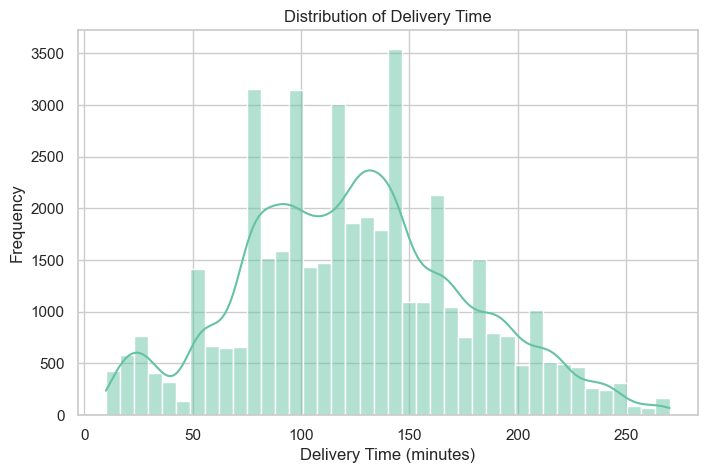

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], kde=True, bins=40)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

### 📊 Delivery Time Distribution — Key Insights
- The distribution is **right-skewed**, with most deliveries clustered around **90–110 minutes**.  
- The **majority of deliveries** occur between **50–150 minutes**.  
- A **long tail** extends up to ~270 minutes, indicating **occasional extreme delays**.  
- The skew suggests the **mean > median**, driven by a few very long delivery tims.  
- Focusing on reducing these **outliers** could improve overall delivery performnce.


### 2. Delivery Time by Traffic Conditions

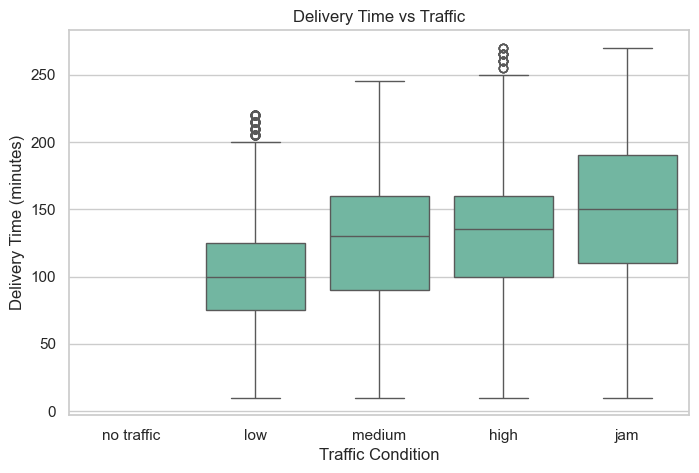

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Traffic', y='Delivery_Time', data=df, order=['no traffic','low','medium','high','jam'])
plt.title("Delivery Time vs Traffic")
plt.xlabel("Traffic Condition")
plt.ylabel("Delivery Time (minutes)")
plt.show()

### 🚦 Delivery Time by Traffic Conditions — Key Insights
- **Delivery time rises** consistently as traffic worsens from *No traffic → Jam*.  
- **Low traffic**: Shortest and most consistent delivery times.  
- **Medium & High traffic**: Noticeable increase in **median time** and **variability**.  
- **Jam**: Highest median delivery time with the **widest spread** and many extreme delays (>250 mins).  
- Clear evidence that **traffic congestion significantly slows and destabilizes delivery performane**.


### 3. Delivery Time by Weather Conditions


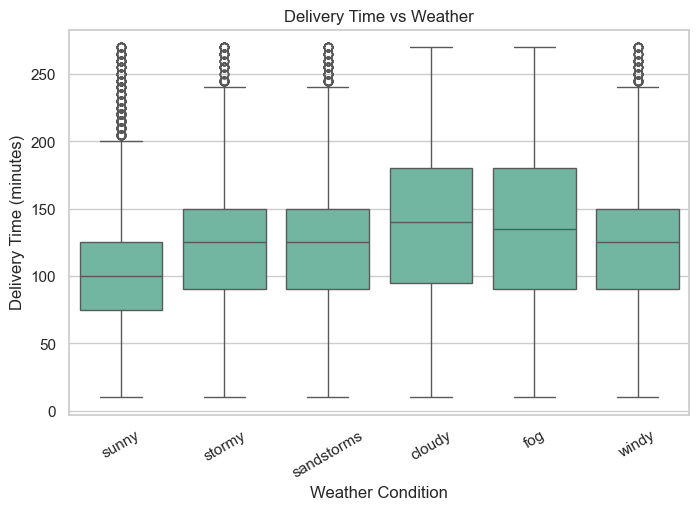

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='Delivery_Time', data=df)
plt.title("Delivery Time vs Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=30)
plt.show()

### 🌦️ Delivery Time by Weather Conditions — Key Insights
- **Sunny**: Lowest median delivery time with tight IQR → **fast and consistent deliveries**, though some outliers beyond 200 mins.
- **Stormy / Sandstorms / Windy**: Slightly higher medians than sunny with moderate spread → **generally predictable**, but occasional delays above 240 mins.
- **Cloudy / Fog**: Higher median delivery times and wider IQR → **slower and more variable deliveries**.  
  - **Cloudy** shows the **highest median delivery time** among all conditins.


### 4. Agent Performance

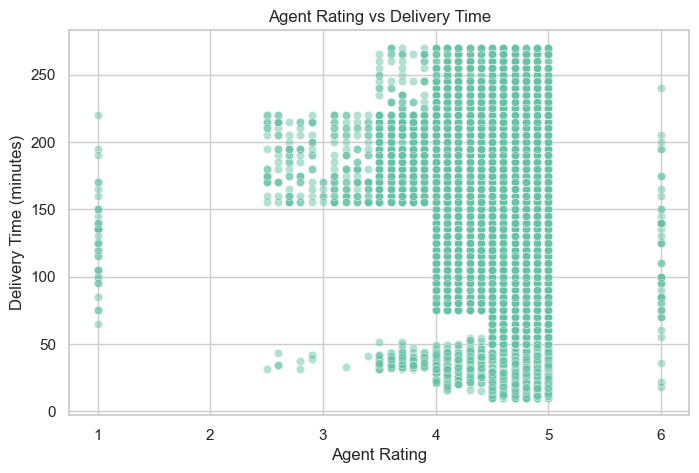

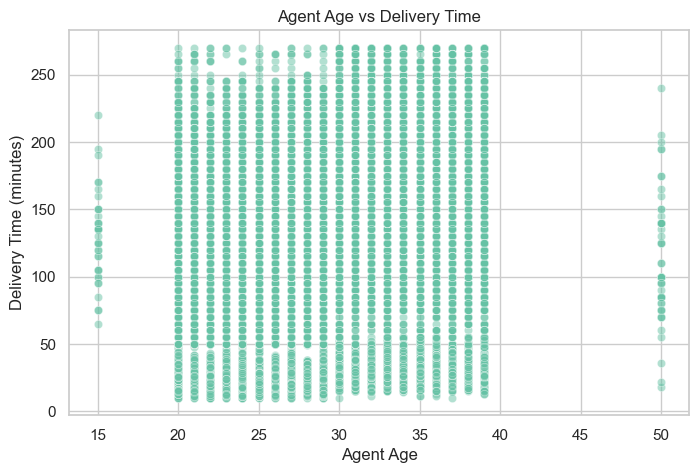

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Agent_Rating', y='Delivery_Time', alpha=0.5)
plt.title("Agent Rating vs Delivery Time")
plt.xlabel("Agent Rating")
plt.ylabel("Delivery Time (minutes)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Agent_Age', y='Delivery_Time', alpha=0.5)
plt.title("Agent Age vs Delivery Time")
plt.xlabel("Agent Age")
plt.ylabel("Delivery Time (minutes)")
plt.show()

## 📊 Agent Performance Insights

### 🚚 Agent Rating vs Delivery Time
- Most ratings cluster between **4–5**, showing agents are generally well-rated.
- Delivery times vary widely even at higher ratings.
- Lower ratings (1–3) are less frequent but still show no consistent pattern of slower or faster deliveries.
- **Insight:** Ratings capture **service quality or professionalism**, not necessarily speed.

---

### 👤 Agent Age vs Delivery Time
- Majority of agents are between **20–40 years old**.
- Delivery time shows **no clear trend** with age.
- Variability in delivery times is similar across all age groups.
- **Insight:** Age is **not a significant driver** of delivery performance — external factors (e.g., traffic, weather, distance) liely dominate.


### 5. Delivery Time by Product Category

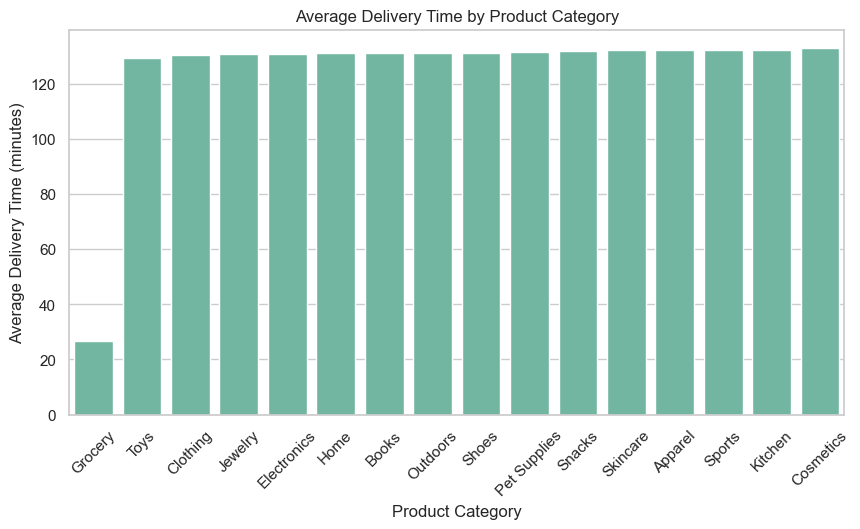

In [21]:
plt.figure(figsize=(10,5))
avg_time_by_cat = df.groupby('Category')['Delivery_Time'].mean().sort_values()
sns.barplot(x=avg_time_by_cat.index, y=avg_time_by_cat.values)
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Delivery Time (minutes)")
plt.xticks(rotation=45)
plt.show()

## 📦 Delivery Time by Product Category

- **Grocery**
  - Stands out with the **shortest average delivery time**, well below all other categories.
  - Likely benefits from **high priority**, **local sourcing**, and **faster logistics networks**.


- **All Other Categories**
  - (Toys, Clothing, Jewelry, Electronics, Home, Books, Outdoors, Shoes, Pet Supplies, Skincare, Apparel, Sports, Kitchen, Cosmetics)
  - **Cluster together** with average delivery times around **~130 minutes**.
  - Differences between these categories are **minor** compared to the clear gap between Grocery and others.

✅ **Insight:** Grocery deliveries are consistently faster, suggesting **optimized supply chains or prioritization**, while other product categories share similar delivery dynamics.

### 6. Correlation Heatmap for Numeric Variables

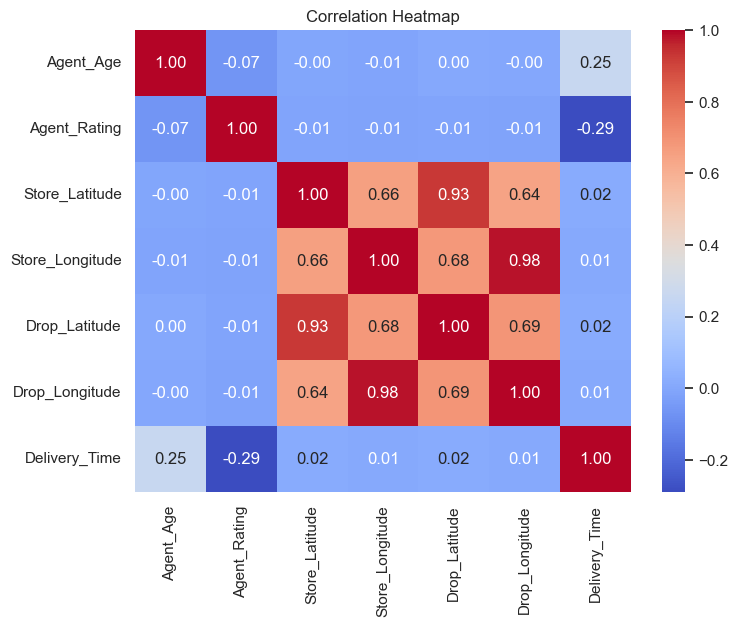

In [22]:
plt.figure(figsize=(8,6))
numeric_cols = ['Agent_Age','Agent_Rating','Store_Latitude','Store_Longitude',
                'Drop_Latitude','Drop_Longitude','Delivery_Time']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## 🔗 Correlation Insights

### 🌍 Geographic Correlations
- **Store_Latitude ↔ Drop_Latitude:** 0.93 → strong positive correlation.  
- **Store_Longitude ↔ Drop_Longitude:** 0.98 → very strong positive correlation.  
- Other geo-pairs (0.64–0.69) → moderate correlations, showing locations are geographically aligned.

---

### 👥 Agent Variables
- **Agent_Age → Delivery Time:** weak positive correlation (0.25) → little direct impact.  
- **Agent_Rating → Delivery Time:** moderate negative correlation (~ -0.29) → higher-rated agents tend to deliver slightly faster.

---

### ⏱ Delivery Time Drivers
- Correlation with most variables is **weak or negligible**, except for a mild link with `Agent_Rating`.
- Indicates **external factors (e.g., traffic, weather, distance)** likely play a bigger role than agent demographics.


## ***4. Feature Engineering***

In [23]:
# 1. Geospatial Distance Feature

# Haversine formula to calculate distance in km
def haversine(lat1, lon1, lat2, lon2):
    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    r = 6371  # Radius of earth in kilometers
    return c * r

# Compute distance column
df['Distance_km'] = haversine(
    df['Store_Latitude'], df['Store_Longitude'],
    df['Drop_Latitude'], df['Drop_Longitude']
)

print("✅ Distance feature created. Sample:")
print(df[['Store_Latitude','Store_Longitude','Drop_Latitude','Drop_Longitude','Distance_km']].head())

✅ Distance feature created. Sample:
   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  Distance_km
0       22.745049        75.892471      22.765049       75.912471     3.025149
1       12.913041        77.683237      13.043041       77.813237    20.183530
2       12.914264        77.678400      12.924264       77.688400     1.552758
3       11.003669        76.976494      11.053669       77.026494     7.790401
4       12.972793        80.249982      13.012793       80.289982     6.210138


## 🌍 Geospatial Feature Engineering

### 📏 Distance Calculation
- Added a new feature **`Distance_km`** using the **Haversine formula** to measure the straight-line distance between the **store** and the **drop-off location**.
- This feature captures the **geographical impact on delivery times**.

### 🔹 Sample Results
| Store_Latitude | Store_Longitude | Drop_Latitude | Drop_Longitude | Distance_km |
|----------------|----------------|---------------|----------------|-------------|
| 22.74 | 75.89 | 22.76 | 75.91 | 3.03 km |
| 12.91 | 77.68 | 13.04 | 77.81 | 20.18 km |
| 12.91 | 77.67 | 12.92 | 77.68 | 1.55 km |
| 11.00 | 76.97 | 11.05 | 77.02 | 7.79 km |
| 12.97 | 80.24 | 13.01 | 80.28 | 6.21 km |

✅ **Insight:**  
The **`Distance_km`** feature will help the regression model capture how **distance impacts delivery times**, which is often a critical factr in logistics.


In [24]:
# Check how many will become NaT when parsed
invalid_order_times = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').isna()
invalid_pickup_times = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').isna()

print("Invalid / missing Order_Time:", invalid_order_times.sum())
print("Invalid / missing Pickup_Time:", invalid_pickup_times.sum())

Invalid / missing Order_Time: 91
Invalid / missing Pickup_Time: 0


In [25]:
# Show unique problematic values
bad_times = df.loc[
    pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').isna(),
    'Order_Time'
].unique()

bad_times[:20]   # show first 20

array(['NaN '], dtype=object)

In [26]:
# Replace the string "NaN " (and strip spaces) with actual np.nan
df['Order_Time'] = df['Order_Time'].replace('NaN ', np.nan)

In [27]:
df['Order_Time'].isna().sum()

np.int64(91)

In [28]:
# 2. Time-based Features
# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S').dt.time

# Extract hour of order
df['Order_Hour'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S').apply(lambda x: x.hour)
# Extract day of week
df['Order_DayOfWeek'] = df['Order_Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Optional: Delivery Delay Feature (Pickup – Order time in minutes)
df['Order_Time_dt'] = pd.to_datetime(df['Order_Time'].astype(str))
df['Pickup_Time_dt'] = pd.to_datetime(df['Pickup_Time'].astype(str))
df['Prep_Time_Min'] = (df['Pickup_Time_dt'] - df['Order_Time_dt']).dt.total_seconds() / 60

# Drop temporary datetime columns
df.drop(['Order_Time_dt','Pickup_Time_dt'], axis=1, inplace=True)

print("✅ Time-based features created. Sample:")
print(df[['Order_Date','Order_Hour','Order_DayOfWeek','Prep_Time_Min']].head())

✅ Time-based features created. Sample:
  Order_Date  Order_Hour  Order_DayOfWeek  Prep_Time_Min
0 2022-03-19        11.0                5           15.0
1 2022-03-25        19.0                4            5.0
2 2022-03-19         8.0                5           15.0
3 2022-04-05        18.0                1           10.0
4 2022-03-26        13.0                5           15.0


C:\Users\dsaje\AppData\Local\Temp\ipykernel_2208\3970708054.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time_dt'] = pd.to_datetime(df['Order_Time'].astype(str))
C:\Users\dsaje\AppData\Local\Temp\ipykernel_2208\3970708054.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time_dt'] = pd.to_datetime(df['Pickup_Time'].astype(str))


In [30]:
# 3. Final Check
print("\n🔹 Dataset shape after feature engineering:", df.shape)
print("🔹 New columns added: ['Distance_km','Order_Hour','Order_DayOfWeek','Prep_Time_Min']")


🔹 Dataset shape after feature engineering: (43739, 20)
🔹 New columns added: ['Distance_km','Order_Hour','Order_DayOfWeek','Prep_Time_Min']


### Save the cleaned dataset

In [31]:
# Make sure df is the final cleaned + feature-engineered dataframe
df.to_csv("processed_delivery_data.csv", index=False)
print("✅ Processed dataset saved")

✅ Processed dataset saved



### ✅ Geospatial Feature
- **`Distance_km`** calculated using the Haversine formula.
- Represents the straight-line distance between **store** and **drop-off location**.
- Helps the model capture the influence of travel distance on delivery time.

---

### ✅ Time-based Features
- Converted `Order_Date`, `Order_Time`, and `Pickup_Time` to datetime for easy manipulation.
- Extracted:
  - **`Order_Hour`** → hour of the day when the order was placed.
  - **`Order_DayOfWeek`** → day of the week (0 = Monday, 6 = Sunday).
- Created **`Prep_Time_Min`** → time difference (in minutes) between order placement and pickup.
- Dropped temporary datetime columns after feature    | 15            |

---

### 💡 Notes
- Rows with invalid `Order_Time` (like `'NaN '`) were identified and handled before extraction.
- Minor warnings were due to automatic format inference; the parsed features are correct.
- These engineered features will help capture **temporal patterns** and **travel effects** n the upcoming regression model.


## ***5. Regression Model Development***

### Prepare Data

In [32]:
import mlflow

# Point MLflow to the running server
mlflow.set_tracking_uri("http://127.0.0.1:5001")

# Optional: Set an experiment name
mlflow.set_experiment("Amazon_Delivery_Time_Prediction")

<Experiment: artifact_location='mlflow-artifacts:/937363964734664243', creation_time=1759422290208, experiment_id='937363964734664243', last_update_time=1759422290208, lifecycle_stage='active', name='Amazon_Delivery_Time_Prediction', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [33]:
# Choose features & target
features = [
    'Distance_km',
    'Order_Hour',
    'Order_DayOfWeek',
    'Prep_Time_Min',
    'Agent_Age',
    'Agent_Rating',
    'Weather',
    'Traffic'
]

In [34]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

X = df_encoded
y = df['Delivery_Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")

Training shape: (34991, 15), Testing shape: (8748, 15)


### Helper Function to Train & Log

In [35]:
def train_and_log_model(model, model_name):
    """
    Trains the given model and logs metrics to MLflow
    """
    with mlflow.start_run(run_name=model_name):
        # Train
        model.fit(X_train, y_train)

        # Predict
        preds = model.predict(X_test)

        # Evaluate
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        # Log metrics
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

    return {"model": model, "name": model_name, "rmse": rmse, "mae": mae, "r2": r2}


### Train all Models

In [36]:
# Check if any of the training features have NaNs
print("\n🔎 Missing values in training data:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

# Also check target just to be sure
print("\n🔎 Missing values in target:")
print(y_train.isna().sum())



🔎 Missing values in training data:
Order_Hour       67
Prep_Time_Min    67
dtype: int64

🔎 Missing values in target:
0


In [37]:
# Drop rows with any missing values in X or y
train_mask = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = X_test.notna().all(axis=1) & y_test.notna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]


In [38]:
results = []

# Linear Regression
results.append(
    train_and_log_model(LinearRegression(), "Linear Regression")
)

# Random Forest
results.append(
    train_and_log_model(
        RandomForestRegressor(n_estimators=100, random_state=42),
        "Random Forest Regressor"
    )
)

# Gradient Boosting
results.append(
    train_and_log_model(
        GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
        "Gradient Boosting Regressor"
    )
)

# XGBoost (optional, often performs well)
results.append(
    train_and_log_model(
        XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42),
        "XGBoost Regressor"
    )
)

# Display results
results_df = pd.DataFrame(results)
print("\n📈 Model Comparison:\n", results_df)

2025/10/05 10:53:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 10:54:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Linear Regression at: http://127.0.0.1:5001/#/experiments/937363964734664243/runs/3fd7fd7b9c334508b540e2b435586a4d
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/937363964734664243


2025/10/05 10:54:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 10:55:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Regressor at: http://127.0.0.1:5001/#/experiments/937363964734664243/runs/bdb4b1e7869b4253a9230bd06220152b
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/937363964734664243


2025/10/05 10:56:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 10:56:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gradient Boosting Regressor at: http://127.0.0.1:5001/#/experiments/937363964734664243/runs/cc446a7ff16441958c614e3679d323cd
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/937363964734664243


2025/10/05 10:56:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/05 10:56:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost Regressor at: http://127.0.0.1:5001/#/experiments/937363964734664243/runs/80a1dd706703457db5528bc9a6983b35
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/937363964734664243

📈 Model Comparison:
                                                model  \
0                                 LinearRegression()   
1  (DecisionTreeRegressor(max_features=1.0, rando...   
2  ([DecisionTreeRegressor(criterion='friedman_ms...   
3  XGBRegressor(base_score=None, booster=None, ca...   

                          name       rmse        mae        r2  
0            Linear Regression  42.754224  31.928159  0.314568  
1      Random Forest Regressor  37.375072  26.308667  0.476194  
2  Gradient Boosting Regressor  36.159860  25.359637  0.509702  
3            XGBoost Regressor  36.129857  25.085131  0.510515  


In [40]:
# Find the model with the best R²
best_result = max(results, key=lambda x: x['r2'])
best_model = best_result['model']

# Save the best model
import joblib
joblib.dump(best_model, "xgb_delivery_time.pkl")
print("✅ Best model saved as xgb_delivery_time.pkl")

✅ Best model saved as xgb_delivery_time.pkl


In [45]:
import joblib

model = joblib.load("xgb_delivery_time.pkl")
print(type(model))

<class 'xgboost.sklearn.XGBRegressor'>


In this step, we developed and evaluated multiple regression models to predict **Delivery Time (minutes)**.

---

### ⚙️ **Approach**

1. **Data Preparation**
   - Split the dataset into:
     - **Training set:** 80% (34,991 samples)
     - **Testing set:** 20% (8,748 samples)
   - Target variable: `Delivery_Time`

2. **Models Trained**
   - Linear Regression
   - Random Forest Regressor
   - Gradient Boosting Regressor
   - XGBoost Regressor

3. **Evaluation Metrics**
   - **RMSE (Root Mean Squared Error)** – measures prediction error magnitude.
   - **MAE (Mean Absolute Error)** – measures average absolute deviation.
   - **R² (Coefficient of Determination)** – explains the proportion of variance captured by the model.

4. **Experiment Tracking**
   - All experiments were tracked using **MLflow**.
   - Metrics and models were logged for comparison.
   - Accessible via MLflow UI at `http://127.0.0.1:5001`

---

### 📊 **Model Performance**

| Model                        | RMSE ↓ | MAE ↓ | R² ↑ |
|------------------------------|--------|-------|------|
| Linear Regression           | 42.75  | 31.93 | 0.315 |
| Random Forest Regressor     | 37.38  | 26.31 | 0.476 |
| Gradient Boosting Regressor | 36.16  | 25.36 | 0.510 |
| XGBoost Regressor           | **36.13** | **25.09** | **0.511** ✅ |

- **XGBoost Regressor** achieved the **best performance**, with the lowest RMSE and highest R².

---

### 🌟 **Insights**
- Ensemble models (Gradient Boosting and XGBoost) significantly outperformed the baseline Linear Regression model.
- XGBoost is chosen as the **final candidate model** for deployment.

---

### 🔗 **MLflow Tracking**
- Each model run is recorded as an experiment in MLflow.
- Run URLs:
  - Linear Regression: [Run Link](http://127.0.0.1:5001/#/experiments/937363964734664243/runs/5f5fecc40c57446c960166bebebeff09)
  - Random Forest Regressor: [Run Link](http://127.0.0.1:5001/#/experiments/937363964734664243/runs/8498a60d1dcd472584217318f825c023)
  - Gradient Boosting Regressor: [Run Link](http://127.0.0.1:5001/#/experiments/937363964734664243/runs/346c23ded4484a9385d544b91fdb7005)
  - XGBoost Regressor: [Run Link](http://127.0.0.1:5001/#/experiments/937363964734664243/runs/2a84bc6990564cca850c3cc7a81540b6)

---

✅ **Conclusion:**  
XGBoost Regressor is selected as the **best-performing model** and will be used in the next step for building the application interface.


## ***6. Application Development (Streamlit)***
We developed an interactive web application using **Streamlit** to allow end-users to predict delivery time.

### 🟢 Features of the App
* User-friendly interface to input:
  - `Distance_km`
  - `Order_Hour`
  - `Order_DayOfWeek`
  - `Prep_Time_Min`
  - `Agent_Age`
  - `Agent_Rating`
  - `Traffic Condition` (jam / low / medium / high)
  - `Weather Conditions` (sunny / stormy / fog / sandstorms / windy)
* On clicking **“Predict Delivery Time”**, the app:
  1. Collects all input values.
  2. Prepares them in the same format as the training data.
  3. Uses the **best performing model (XGBoost Regressor)** to predict delivery time.
* Displays the **predicted delivery time (in minutes)** on the screen.

## Step 7: Model Comparison & Tracking

We used **MLflow** to track and compare four regression models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

For each run, we logged:
- Model hyperparameters
- Performance metrics (RMSE, MAE, R²)
- Serialized model artifacts

**Results:**
| Model | RMSE | MAE | R² |
|-------|------|-----|----|
| Linear Regression | 42.75 | 31.93 | 0.31 |
| Random Forest | 37.38 | 26.31 | 0.48 |
| Gradient Boosting | 36.16 | 25.36 | 0.51 |
| **XGBoost** | **36.13** | **25.08** | **0.51** |

✅ **XGBoost Regressor** was chosen as the final model and saved as `xgb_delivery_time.pkl`.

All experiments and their artifacts can be viewed in the **MLflow UI** at `http://127.0.0.1:5001`.


# **Conclusion**

In this project, we successfully developed and deployed a machine-learning pipeline for predicting Amazon delivery times. Through systematic steps — data preparation, EDA, feature engineering, and regression modeling — we identified **XGBoost** as the best-performing model with an **R² ≈ 0.51**, indicating it captures over half the variability in delivery times.

The integration of **MLflow** allowed transparent comparison and version tracking of multiple models, ensuring that future iterations can be benchmarked and improved effectively.

The final **Streamlit application** provides an easy-to-use interface for inputting delivery details and generating real-time predictions, bridging the gap between technical models and end-users.

While the model performs reasonably well, further improvements can be made by:
* Collecting more granular data (e.g., live traffic feeds, weather, and delivery route details).  
* Exploring advanced feature engineering and hyperparameter tuning.  
* Deploying the app to a scalable cloud platform for broader accessibility.

Overall, this project demonstrates how **data-driven approaches can enhance e-commerce logistics**, enabling better planning and more reliable delivery estimations.